# Filtros Espaciales

## Librerías

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
# Filtro Gaussiano MxN
def gaussian_kernel(size, sigma=1):
    """
    Genera un kernel gaussiano de tamaño arbitrario.
    :param size: Tamaño del kernel (3, 5, 7, ...).
    :param sigma: Desviación estándar de la distribución gaussiana.
    :return: Kernel gaussiano normalizado.
    """
    # Crear una cuadrícula de coordenadas centradas
    k = size // 2
    x, y = np.mgrid[-k:k+1, -k:k+1]

    # Calcular la función gaussiana
    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    # Normalizar para que los valores sumen 1
    return gaussian / gaussian.sum()

## Aproximación a LPF y HPF

Saving cameraman.png to cameraman (3).png


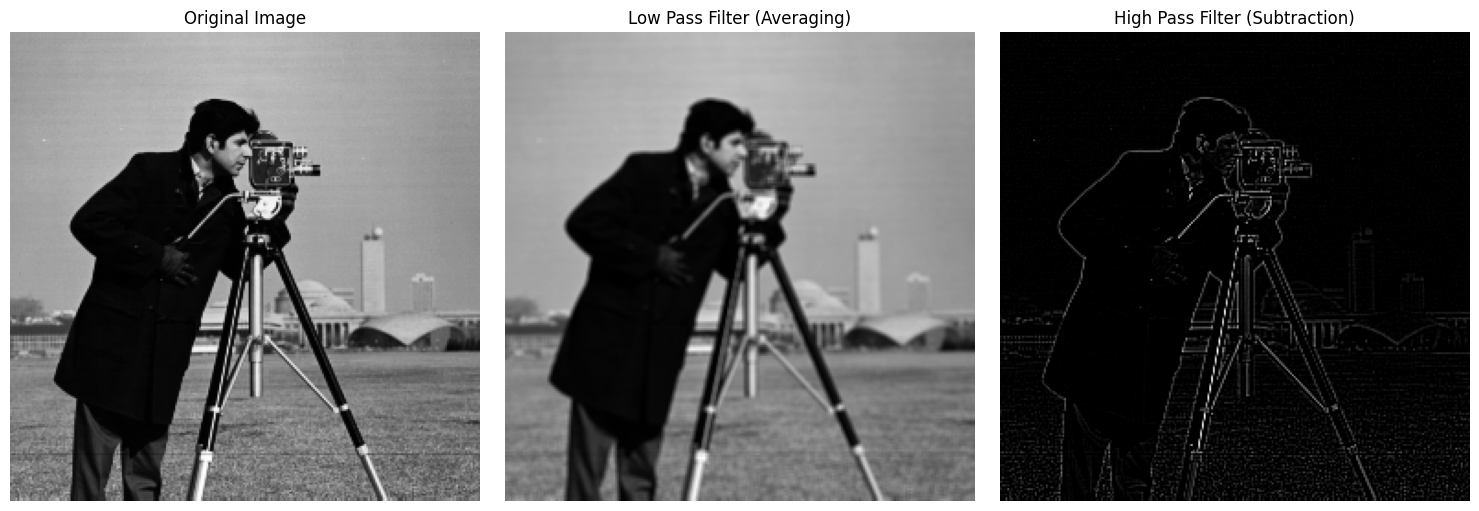

In [ ]:
# Subir una imagen local
uploaded = files.upload()

# Leer la imagen
image_path = list(uploaded.keys())[0]
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Filtro de paso bajo (promediado)
kernel_size = 3
lpf_image = cv2.blur(original_image, (kernel_size, kernel_size))

# Filtro de paso alto (sustracción)
hpf_image = cv2.subtract(original_image, lpf_image)

# Mostrar los resultados
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image, cmap='gray')
plt.axis('off')

# Imagen con filtro paso bajo
plt.subplot(1, 3, 2)
plt.title("Low Pass Filter (Averaging)")
plt.imshow(lpf_image, cmap='gray')
plt.axis('off')

# Imagen con filtro paso alto
plt.subplot(1, 3, 3)
plt.title("High Pass Filter (Subtraction)")
plt.imshow(hpf_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## Filtros Paso Bajo

- La función cv2.filter2D en OpenCV maneja los bordes de las imágenes mediante un método de relleno de bordes (padding)

1. `cv2.BORDER_CONSTANT`
  - Rellena los bordes con un valor constante (por defecto, 0, es decir, negro).

2. `cv2.BORDER_REPLICATE`
  - Replica el valor de los píxeles más cercanos al borde.

3. `cv2.BORDER_REFLECT`
  - Refleja los píxeles del borde, pero excluye el último valor del borde.

4. `cv2.BORDER_REFLECT_101` o `cv2.BORDER_DEFAULT`
  - Similar a `BORDER_REFLECT`, pero excluye tanto el primer como el último valor reflejado.

5. Valor por defecto:
  - Si no se especifica un `borderType`, OpenCV utiliza **`cv2.BORDER_DEFAULT`**, equivalente a **`cv2.BORDER_REFLECT_101`**.

  https://wikidocs.net/231809

Saving cameraman.png to cameraman (4).png


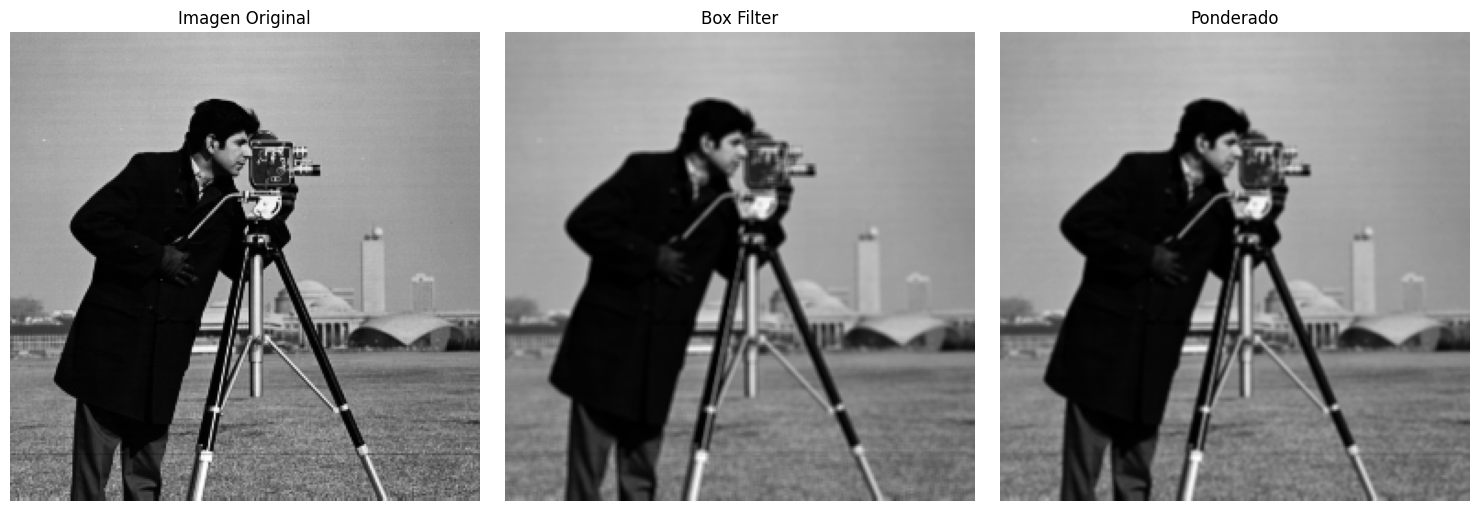

In [ ]:
# Subir una imagen local
uploaded = files.upload()
# Leer la imagen
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Crear el primer filtro (Box Filter)
m=3
n=3
box_filter = np.ones((m, n), dtype=np.float32) / (m*n)

# Crear el segundo filtro (Gaussian-like Filter)
pond_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16

# Aplicar el primer filtro
filtered_image_box = cv2.filter2D(image, ddepth=-1, kernel=box_filter)

# Aplicar el segundo filtro
filtered_image_pond = cv2.filter2D(image, ddepth=-1, kernel=pond_filter)

# Mostrar resultados
plt.figure(figsize=(15, 5))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Imagen con Box Filter
plt.subplot(1, 3, 2)
plt.title("Box Filter")
plt.imshow(filtered_image_box, cmap='gray')
plt.axis('off')

# Imagen con Gaussian-like Filter
plt.subplot(1, 3, 3)
plt.title("Ponderado")
plt.imshow(filtered_image_pond, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

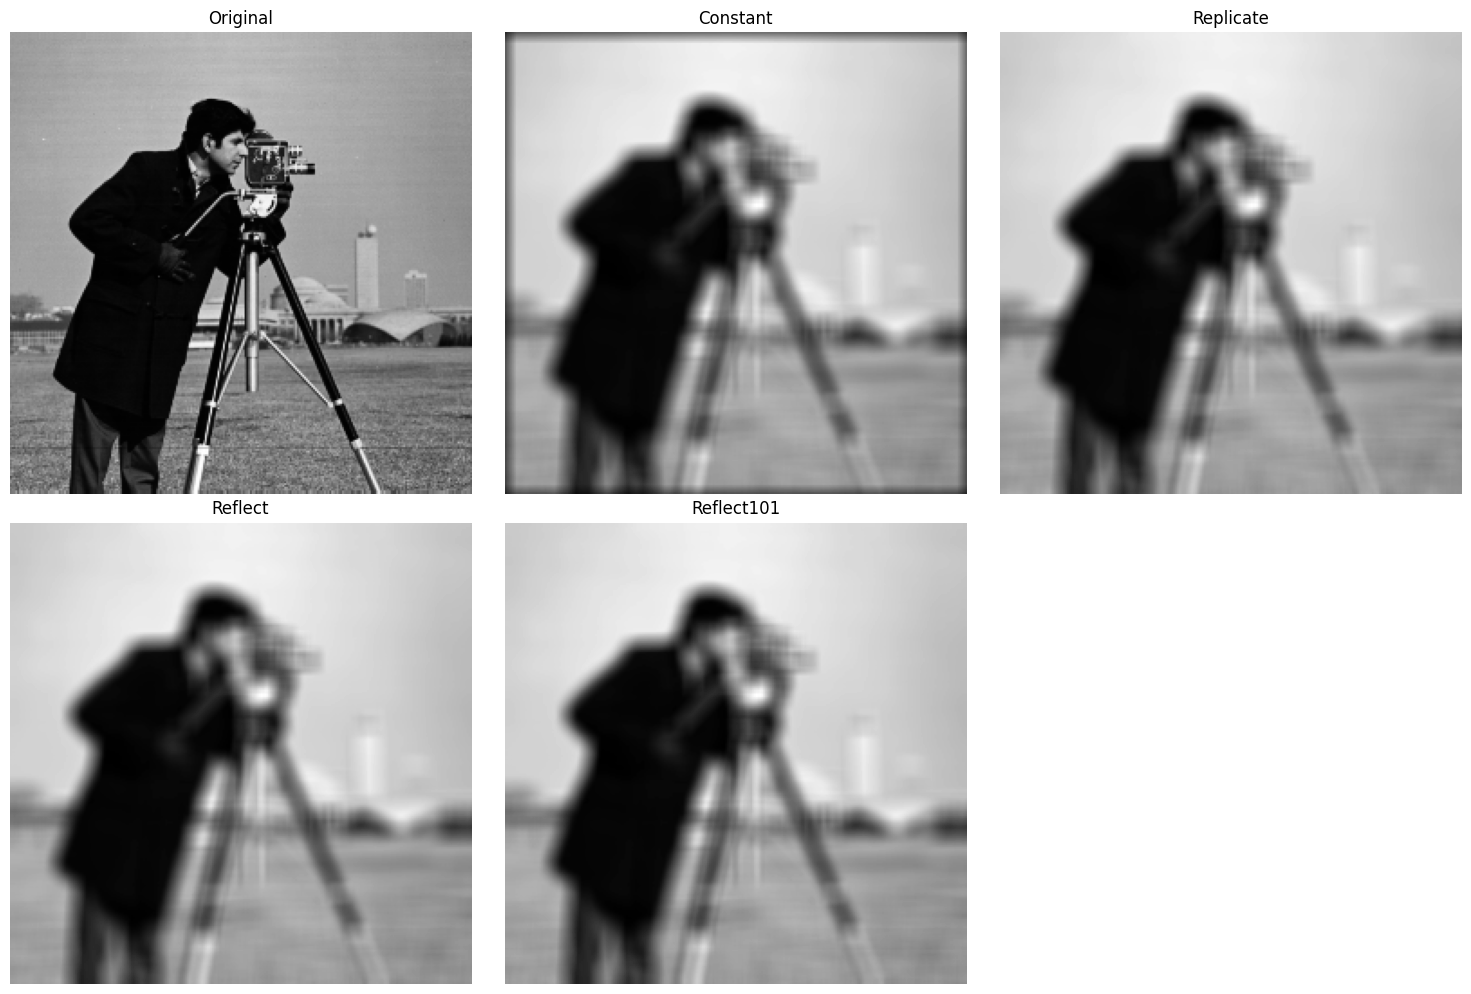

In [ ]:
# Crear un kernel (Box Filter)
kernel = np.ones((12, 12), dtype=np.float32) / 144

# Aplicar filtro con diferentes tipos de bordes
constant = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_CONSTANT)
replicate = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REPLICATE)
reflect = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT)
reflect101 = cv2.filter2D(image, -1, kernel, borderType=cv2.BORDER_REFLECT_101)

# Mostrar resultados
titles = ['Original', 'Constant', 'Replicate', 'Reflect', 'Reflect101']
images = [image, constant, replicate, reflect, reflect101]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

## Filtro Paso Alto

### Operador Gradiente

Saving descarga.png to descarga (2).png


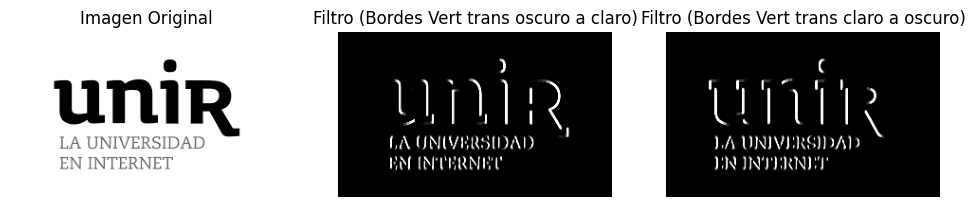

In [ ]:
# Subir una imagen local
uploaded = files.upload()
# Leer la imagen
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Definir los filtros paso-alto (kernels) de la diapositiva
kernels = {
    "Filtro (Bordes Vert trans oscuro a claro)": np.array([[-1,  0,  1],
                                                           [-1,  0,  1],
                                                           [-1,  0,  1]]),

    "Filtro (Bordes Vert trans claro a oscuro)": np.array([[ 1,  0, -1],
                                                           [ 1,  0, -1],
                                                           [ 1,  0, -1]]),

}

# Aplicar los filtros a la imagen y guardar los resultados
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items(), start=2):
  # Updated lista with enough elements to avoid IndexError
  plt.subplot(1, 3,i)
  plt.title(name, fontsize=12)
  plt.imshow(filtered_image, cmap='gray')
  plt.axis('off')

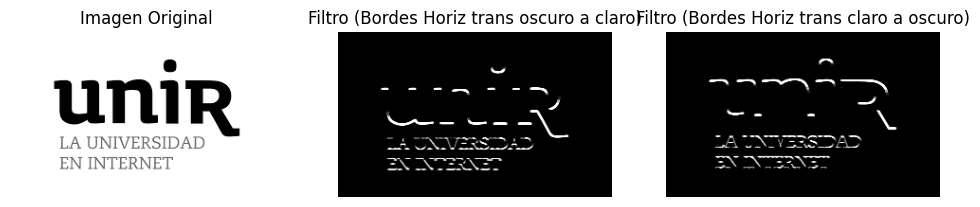

In [ ]:
# Definir los filtros paso-alto (kernels) de la diapositiva
kernels = {
    "Filtro (Bordes Horiz trans oscuro a claro)": np.array([[-1, -1, -1],
                                                            [ 0,  0,  0],
                                                            [ 1,  1,  1]]),

    "Filtro (Bordes Horiz trans claro a oscuro)": np.array([[ 1,  1,  1],
                                                            [ 0,  0,  0],
                                                            [-1, -1, -1]]),

}

# Aplicar los filtros a la imagen y guardar los resultados
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items(), start=2):
  # Updated lista with enough elements to avoid IndexError
  plt.subplot(1, 3,i)
  plt.title(name, fontsize=12)
  plt.imshow(filtered_image, cmap='gray')
  plt.axis('off')

### Operador Sobel

Saving molinillo.png to molinillo (2).png


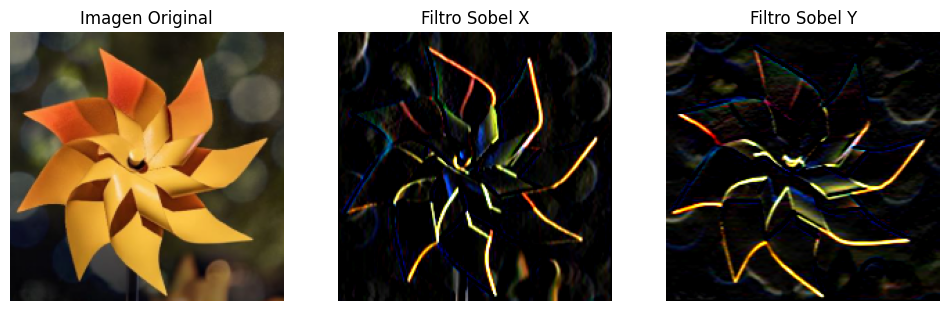

In [ ]:
# Subir una imagen local
uploaded = files.upload()
# Leer la imagen
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Definir los filtros paso-alto (kernels) de la diapositiva
kernels = {
    "Filtro Sobel X": np.array([[1,  0,  -1],
                                [2,  0,  -2],
                                [1,  0,  -1]]),

    "Filtro Sobel Y": np.array([[ 1,    2,   1],
                                [ 0,    0,   0],
                                [ -1,  -2,  -1]]),

}

# Aplicar los filtros a la imagen y guardar los resultados
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image)
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items(), start=2):
  # Updated lista with enough elements to avoid IndexError
  plt.subplot(1, 3,i)
  plt.title(name, fontsize=12)
  plt.imshow(filtered_image)
  plt.axis('off')

### Bordes Diagonales

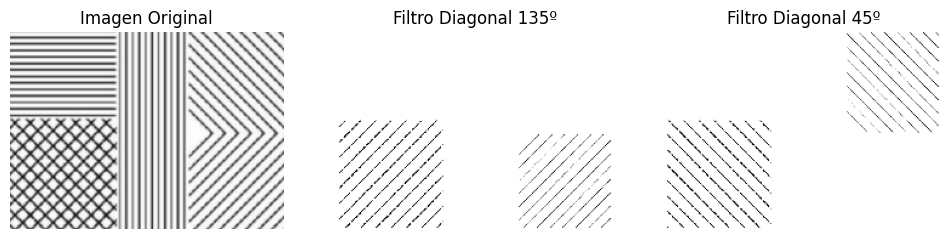

In [ ]:
# Subir una imagen local
# uploaded = files.upload()
# # Leer la imagen
# image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Definir los filtros paso-alto (kernels) de la diapositiva
c = 4
kernels = {
    "Filtro Diagonal 135º": np.array([[-1, -1,   c],
                                      [-1,  c,  -1],
                                      [ c, -1,  -1]]),

    "Filtro Diagonal 45º": np.array([[  c, -1,  -1],
                                     [ -1,  c,  -1],
                                     [ -1, -1,  c]]),

}

# Aplicar los filtros a la imagen y guardar los resultados
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image)
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items(), start=2):
  # Updated lista with enough elements to avoid IndexError
  plt.subplot(1, 3,i)
  plt.title(name, fontsize=12)
  plt.imshow(filtered_image)
  plt.axis('off')

### Operador Laplaciano

Saving moon.jpg to moon (7).jpg


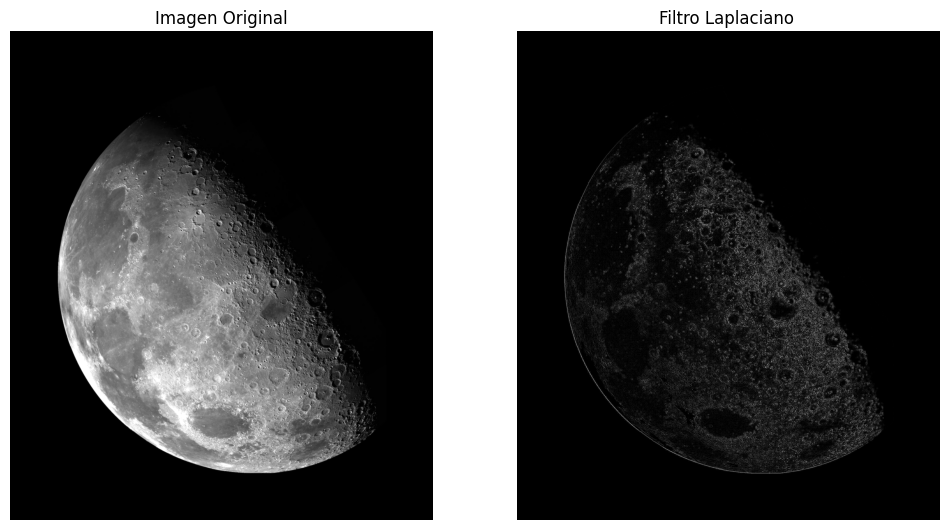

In [ ]:
# Subir una imagen local
uploaded = files.upload()
# Leer la imagen
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Definir los filtros paso-alto (kernels) de la diapositiva
c = 8
kernels = {

    "Filtro Laplaciano ": np.array([ [ 1,  1,   1],
                                     [ 1, -c,   1],
                                     [ 1,  1,   1]]),

}

# Aplicar los filtros a la imagen y guardar los resultados
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(1, 2, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items(), start=2):
  # Updated lista with enough elements to avoid IndexError
  plt.subplot(1, 2, i)
  plt.title(name, fontsize=12)
  plt.imshow(filtered_image, cmap='gray')
  plt.axis('off')

Saving cameraman.png to cameraman (9).png


(-0.5, 255.5, 255.5, -0.5)

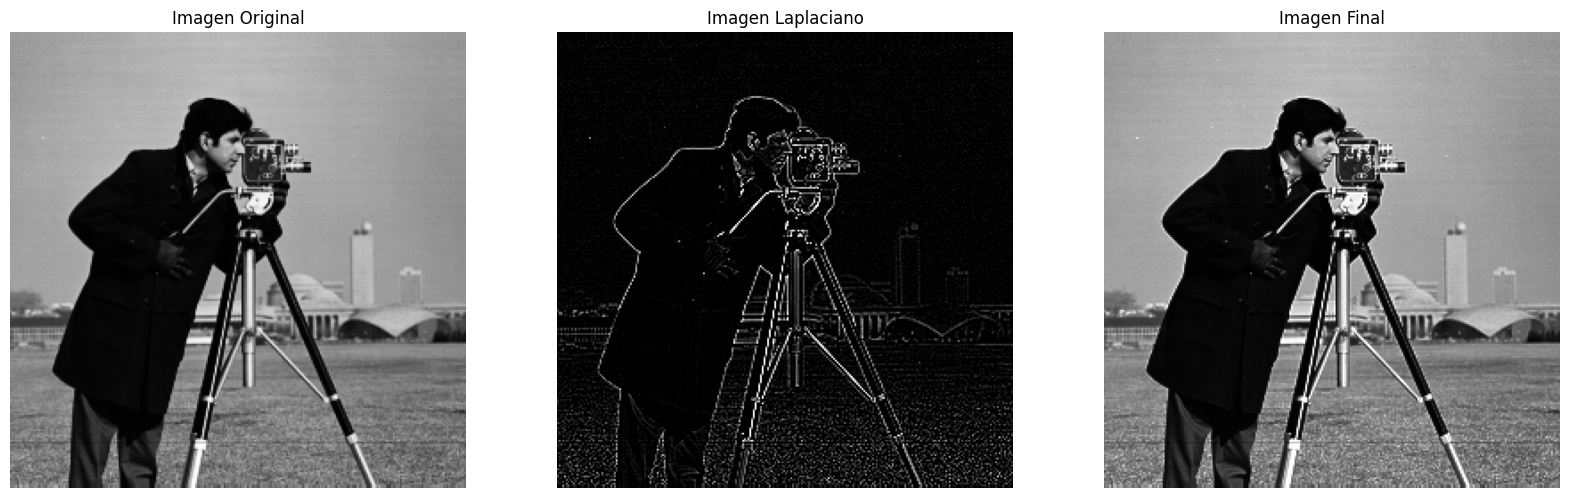

In [ ]:
# Subir una imagen local
uploaded = files.upload()
# Leer la imagen
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
# Definir los filtros paso-alto (kernels) de la diapositiva
kernel = np.array([[ 0, -1,  0],
                   [-1,  4, -1],
                   [ 0, -1,  0]])
# Aplicar Laplaciano
laplacian = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Realce de detalles
lambda_factor = 0.25  # Ajustar según necesidad
enhanced_img = cv2.convertScaleAbs(image + lambda_factor * laplacian)

plt.figure(figsize=(20, 15))
# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Imagen Laplaciano
plt.subplot(1, 3, 2)
plt.title("Imagen Laplaciano", fontsize=12)
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

# Imagen Final
plt.subplot(1, 3, 3)
plt.title("Imagen Final", fontsize=12)
plt.imshow(enhanced_img, cmap='gray')
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

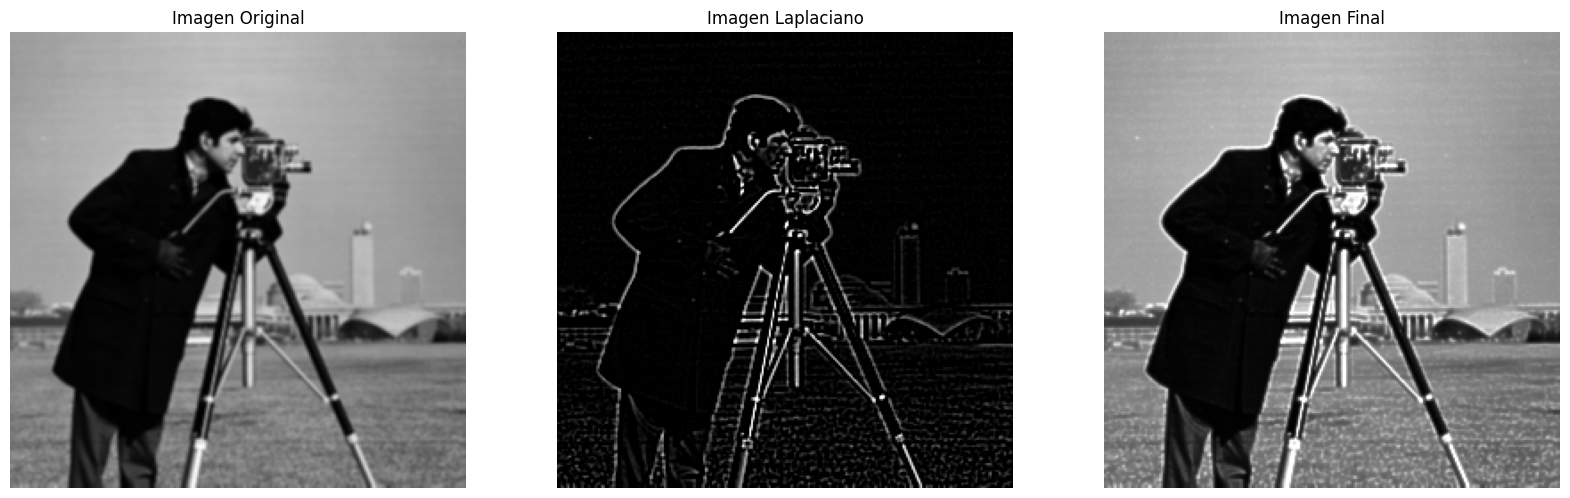

In [ ]:
# Crear el segundo filtro (Gaussian-like Filter)
pond_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16

# Aplicar el segundo filtro
filtered_image_pond = cv2.filter2D(image, ddepth=-1, kernel=pond_filter)
# Definir los filtros paso-alto (kernels) de la diapositiva
kernel = np.array([[ -1, -1,  -1],
                   [ -1,  8,  -1],
                   [ -1, -1,  -1]])
# Aplicar Laplaciano
laplacian = cv2.filter2D(filtered_image_pond, ddepth=-1, kernel=kernel)

# Realce de detalles
lambda_factor = 0.5  # Ajustar según necesidad
enhanced_img = cv2.convertScaleAbs(filtered_image_pond + lambda_factor * laplacian)

plt.figure(figsize=(20, 15))
# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(filtered_image_pond, cmap='gray')
plt.axis('off')

# Imagen Laplaciano
plt.subplot(1, 3, 2)
plt.title("Imagen Laplaciano", fontsize=12)
plt.imshow(laplacian, cmap='gray')
plt.axis('off')

# Imagen Final
plt.subplot(1, 3, 3)
plt.title("Imagen Final", fontsize=12)
plt.imshow(enhanced_img, cmap='gray')
plt.axis('off')

### MDE Filtros

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 55.7 MB/s eta 0:00:00


In [ ]:
# Paso 1: Subir el archivo GeoTIFF desde tu máquina local
import rasterio
from scipy.ndimage import convolve

# Subir archivo desde tu equipo
uploaded = files.upload()

# Obtener el nombre del archivo subido
filename = list(uploaded.keys())[0]
print(f"Archivo subido: {filename}")

# Paso 2: Leer el archivo GeoTIFF
with rasterio.open(filename) as src:
    dem = src.read(1)  # Leer la primera banda (matriz de elevación)
    profile = src.profile  # Guardar metadatos del archivo

# Mostrar información del DEM
print(f"Dimensiones del DEM: {dem.shape}")
print(f"Rango de valores: Min={dem.min()}, Max={dem.max()}")

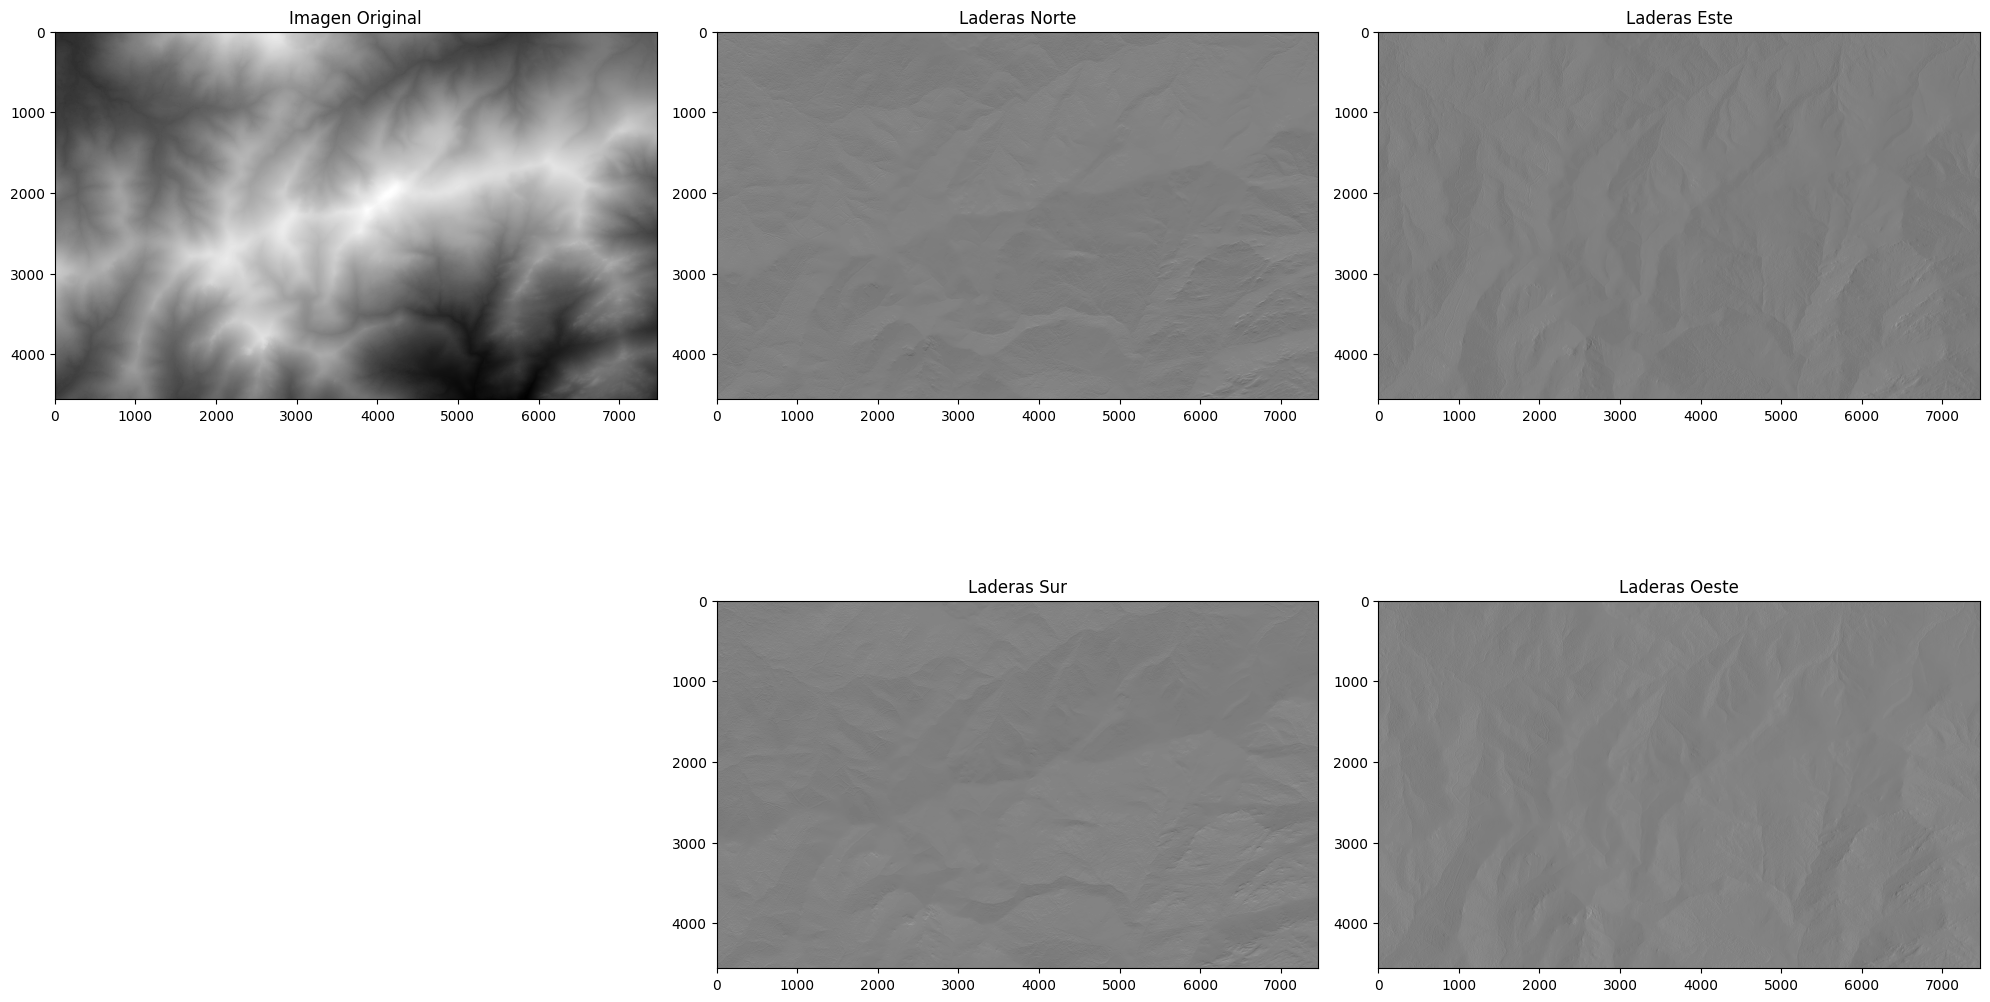

In [ ]:
# Paso 3: Definir los filtros (kernels) para laderas norte y este
kernel_north = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]
])

kernel_east = np.array([
    [-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]
])

# Aplicar convolución para detectar laderas 2dFilter
laderas_norte = cv2.filter2D(dem, -1, kernel_north)
laderas_este = cv2.filter2D(dem, -1, kernel_east)
laderas_sur = cv2.filter2D(dem, -1, -1*kernel_north)
laderas_oeste = cv2.filter2D(dem, -1, -1*kernel_east)

# Aplicar convolución para detectar laderas con scipy
# laderas_norte = convolve(dem, kernel_north)
# laderas_este = convolve(dem, kernel_east)

# Normalizar los resultados para visualización
laderas_norte_norm = (laderas_norte - laderas_norte.min()) / (laderas_norte.max() - laderas_norte.min()) * 255
laderas_este_norm = (laderas_este - laderas_este.min()) / (laderas_este.max() - laderas_este.min()) * 255
laderas_sur_norm = (laderas_sur - laderas_sur.min()) / (laderas_sur.max() - laderas_sur.min()) * 255
laderas_oeste_norm = (laderas_oeste - laderas_oeste.min()) / (laderas_oeste.max() - laderas_oeste.min()) * 255

# Paso 4: Visualizar los resultados
plt.figure(figsize=(20, 12))

# Imagen Original
plt.subplot(2, 3, 1)
plt.imshow(dem, cmap='gray')
plt.title("Imagen Original")

# Laderas norte
plt.subplot(2, 3, 2)
plt.imshow(laderas_norte, cmap='gray')
plt.title("Laderas Norte")

# Laderas este
plt.subplot(2, 3, 3)
plt.imshow(laderas_este, cmap='gray')
plt.title("Laderas Este")

#Laderas sur
plt.subplot(2, 3, 5)
plt.imshow(laderas_sur, cmap='gray')
plt.title("Laderas Sur")

#Laderas oeste
plt.subplot(2, 3, 6)
plt.imshow(laderas_oeste, cmap='gray')
plt.title("Laderas Oeste")

plt.tight_layout()

plt.show()

## Detección de Bordes

### ¿Qué es un borde?¿Cómo detectarlo?

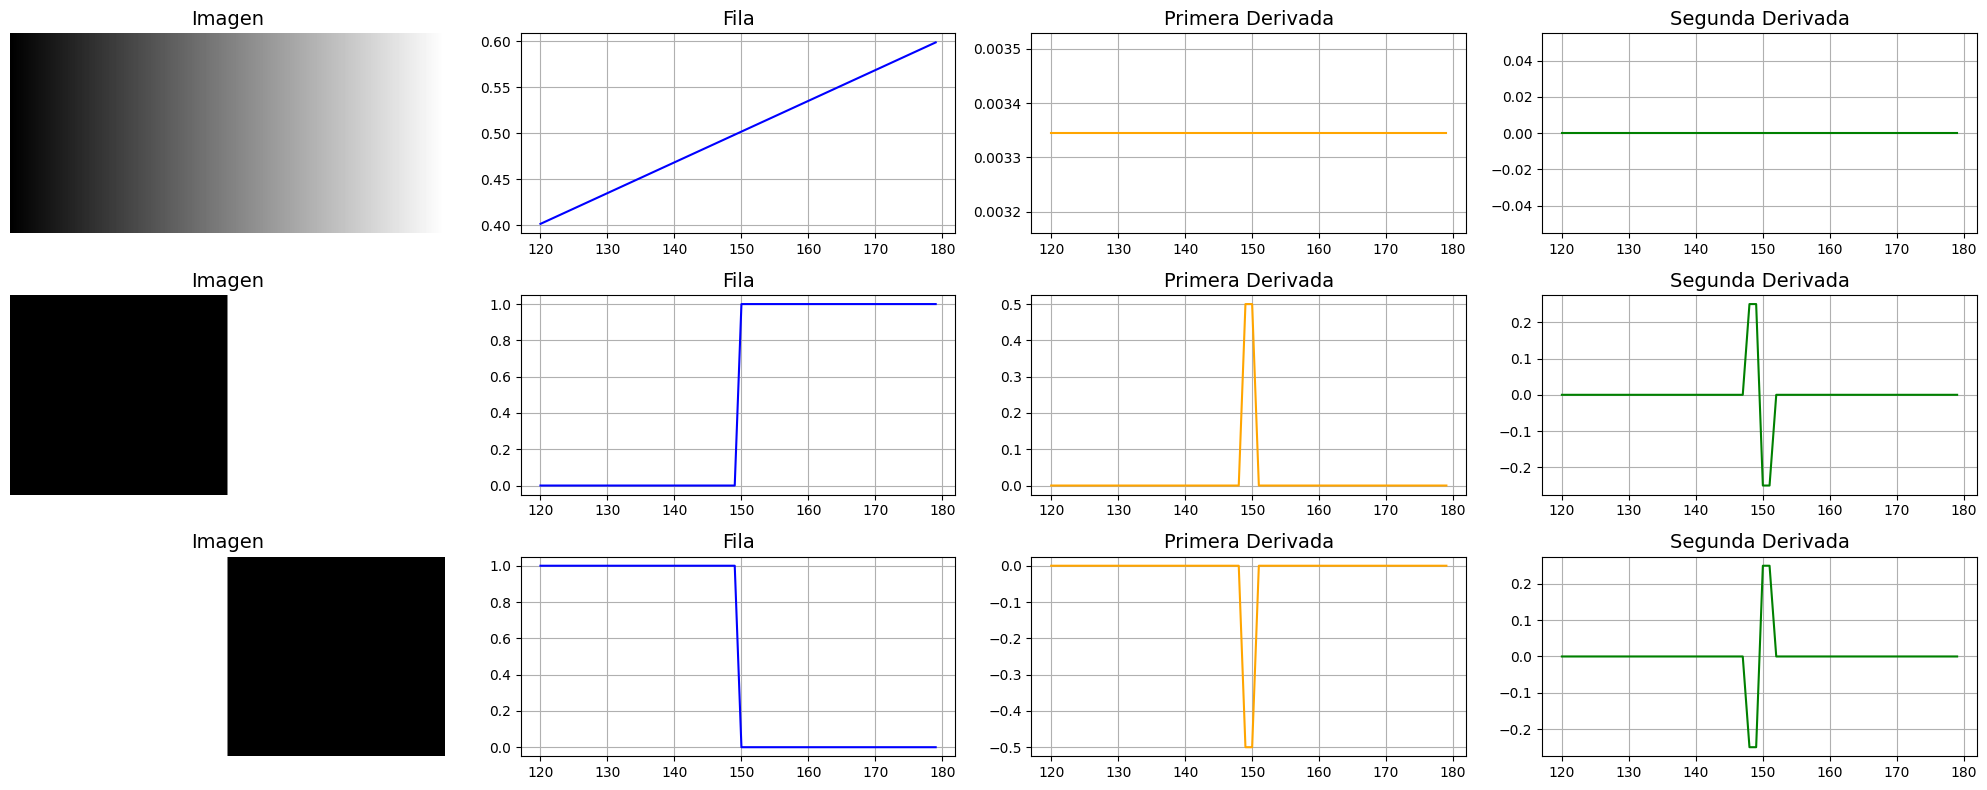

In [ ]:
# Generar imágenes sintéticas
image1 = np.tile(np.linspace(0, 1, 300), (100, 1))  # Gradiente lineal
image2 = np.zeros((100, 300))
image2[:, 150:300] = 1  # Escalón abrupto
image3 = np.ones((100, 300))
image3[:, 150:300] = 0  # Escalón abrupto

# Lista de imágenes y títulos
images = [image1,image2, image3]
titles = ["Gradiente Lineal","Escalón abrupto", "Escalón progresivo"]

# Graficar sin usar "axes" para cada elemento por separado
plt.figure(figsize=(20, 8))

for i, (image, title) in enumerate(zip(images, titles)):
    x = np.arange(image.shape[1])  # Eje x
    intensity = image[image.shape[0] // 2, :]  # Tomar una fila central

    # Calcular derivadas
    first_derivative = np.gradient(intensity, x)
    second_derivative = np.gradient(first_derivative, x)
    rounded_first_derivative = np.round(first_derivative, decimals=10)
    rounded_second_derivative = np.round(second_derivative, decimals=10)


    # Graficar la imagen
    plt.subplot(len(images), 4, i * 4 + 1)
    plt.imshow(image, cmap="gray", aspect="auto")
    plt.title("Imagen", fontsize=14)
    plt.axis("off")

    # Graficar la fila
    plt.subplot(len(images), 4, i * 4 + 2)
    plt.plot(x[120:180], intensity[120:180], color="blue")
    plt.title("Fila", fontsize=14)
    plt.grid()

    # Graficar la primera derivada
    plt.subplot(len(images), 4, i * 4 + 3)
    plt.plot(x[120:180], rounded_first_derivative[120:180], color="orange")
    plt.title("Primera Derivada", fontsize=14)
    plt.grid()

    # Graficar la segunda derivada
    plt.subplot(len(images), 4, i * 4 + 4)
    plt.plot(x[120:180], rounded_second_derivative[120:180], color="green")
    plt.title("Segunda Derivada", fontsize=14)
    plt.grid()

plt.tight_layout()
plt.show()

### Operador Roberts

Saving molinillo.png to molinillo (3).png


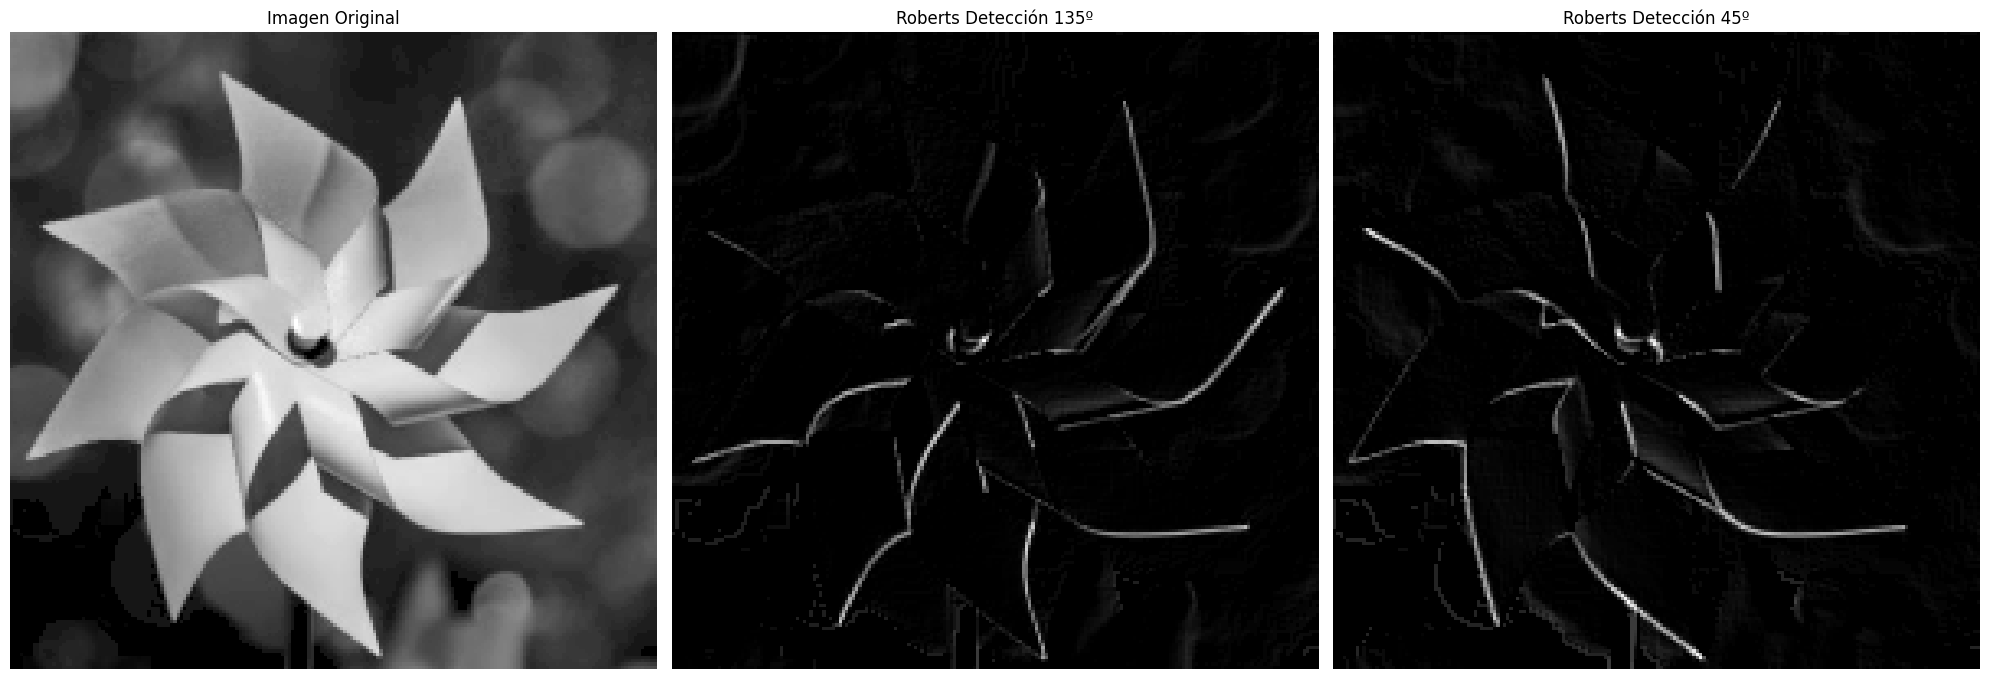

In [ ]:
# Subir una imagen local
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Leer la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Definir los filtros Roberts (kernels)
kernel_roberts_135 = np.array([[1,  0],
                               [0, -1]])
kernel_roberts_45 = np.array([[0,  1],
                              [-1, 0]])

# Aplicar filtros Roberts
roberts_135 = cv2.filter2D(image, ddepth=-1, kernel=kernel_roberts_135)
roberts_45 = cv2.filter2D(image, ddepth=-1, kernel=kernel_roberts_45)

# Magnitud del gradiente (combinación de ambos)
roberts_gradient = cv2.convertScaleAbs(roberts_135 + roberts_45)

# Graficar los resultados
plt.figure(figsize=(20, 10))

# Imagen original
plt.subplot(1, 3, 1)
plt.title("Imagen Original", fontsize=12)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Imagen con gradiente Roberts en X
plt.subplot(1, 3, 2)
plt.title("Roberts Detección 135º", fontsize=12)
plt.imshow(roberts_135, cmap='gray')
plt.axis('off')

# Imagen con gradiente combinado (detector de bordes)
plt.subplot(1, 3, 3)
plt.title("Roberts Detección 45º", fontsize=12)
plt.imshow(roberts_45, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

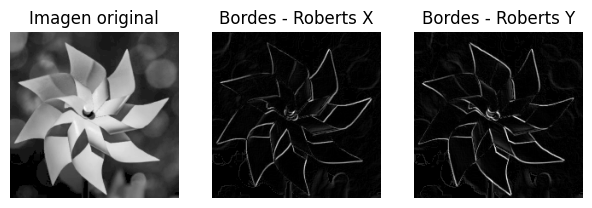

In [ ]:
# Normalizar la imagen a rango 0-255 si es necesario
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Definir los kernels del operador de Roberts
kernel_x = np.array([[1,  0],
                     [0, -1]], dtype=np.float32)

kernel_y = np.array([[0,  1],
                     [-1, 0]], dtype=np.float32)

# Aplicar los filtros de Roberts
roberts_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
roberts_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

# Mostrar los resultados
plt.figure(figsize=(10, 8))

plt.subplot(1, 4, 1)
plt.title("Imagen original")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Bordes - Roberts X")
plt.imshow(np.abs(roberts_x), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Bordes - Roberts Y")
plt.imshow(np.abs(roberts_y), cmap='gray')
plt.axis("off")

plt.show()

### Operador Prewitt

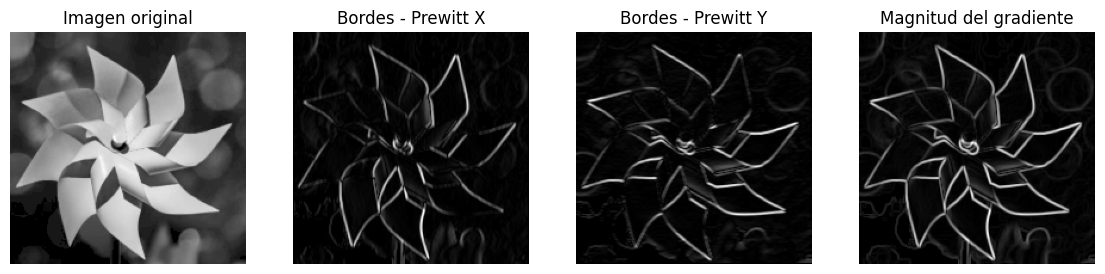

In [ ]:
# Normalizar la imagen a rango 0-255 si es necesario
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Definir los kernels del operador de Prewitt
kernel_x = np.array([[-1, 0, 1],
                     [-1, 0, 1],
                     [-1, 0, 1]], dtype=np.float32)

kernel_y = np.array([[ 1,  1,  1],
                     [ 0,  0,  0],
                     [-1, -1, -1]], dtype=np.float32)

# Aplicar los filtros de Prewitt
prewitt_x = cv2.filter2D(image, cv2.CV_64F, kernel_x)
prewitt_y = cv2.filter2D(image, cv2.CV_64F, kernel_y)

# Calcular la magnitud del gradiente
magnitude = np.sqrt(prewitt_x ** 2 + prewitt_y ** 2)
magnitude = np.uint8(magnitude / magnitude.max() * 255)  # Escalar a rango 0-255

# Mostrar los resultados
plt.figure(figsize=(14, 8))

plt.subplot(1, 4, 1)
plt.title("Imagen original")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Bordes - Prewitt X")
plt.imshow(np.abs(prewitt_x), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Bordes - Prewitt Y")
plt.imshow(np.abs(prewitt_y), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Magnitud del gradiente")
plt.imshow(magnitude, cmap='gray')
plt.axis("off")

plt.show()

### Operador Sobel

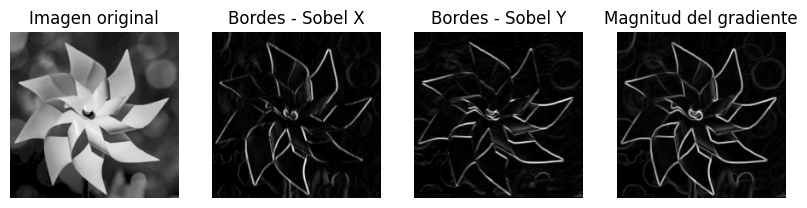

In [ ]:
# Normalizar la imagen a rango 0-255 si es necesario
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)

# Aplicar los filtros Sobel para las direcciones X y Y
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Gradiente en X
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Gradiente en Y

# Calcular la magnitud del gradiente
magnitude = np.sqrt(sobel_x ** 2 + sobel_y ** 2)
magnitude = np.uint8(magnitude / magnitude.max() * 255)  # Escalar a rango 0-255

# Mostrar los resultados
plt.figure(figsize=(10, 8))

plt.subplot(1, 4, 1)
plt.title("Imagen original")
plt.imshow(image, cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Bordes - Sobel X")
plt.imshow(np.abs(sobel_x), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Bordes - Sobel Y")
plt.imshow(np.abs(sobel_y), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Magnitud del gradiente")
plt.imshow(magnitude, cmap='gray')
plt.axis("off")

plt.show()


### Canny

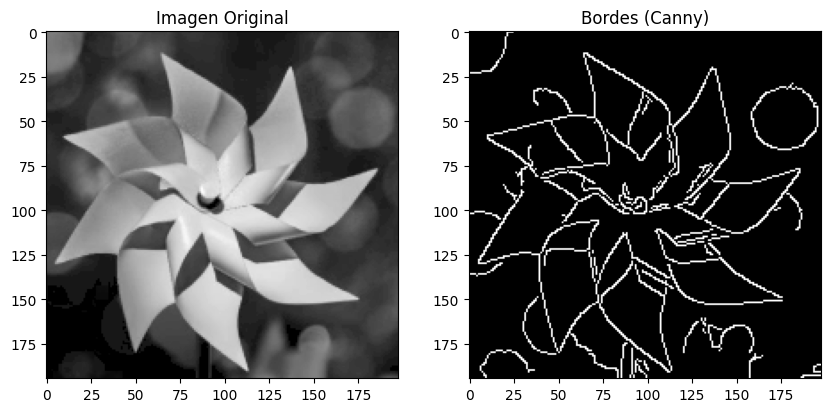

In [ ]:
# Aplicar el detector Canny
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(image, low_threshold, high_threshold)

# Mostrar resultados
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1), plt.title("Imagen Original"), plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2), plt.title("Bordes (Canny)"), plt.imshow(edges, cmap='gray')
plt.show()

Saving coins.jpg to coins.jpg


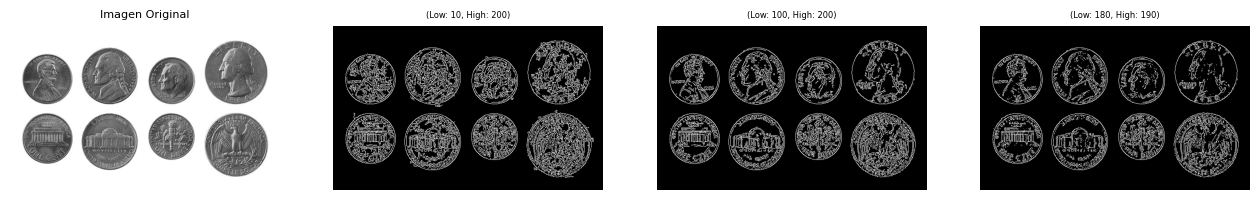

In [ ]:
# Cargar la imagen
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Leer la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Configuraciones de umbrales
thresholds = [
    {"low": 10, "high": 200, "name": "Extremos Lejanos"},
    {"low": 100, "high": 200, "name": "Intermedios"},
    {"low": 180, "high": 190, "name": "Umbrales Cercanos"}
]
# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(16, 8))

# Imagen original
plt.subplot(1, 4, 1)
plt.title("Imagen Original", fontsize=8)
plt.imshow(image, cmap='gray')
plt.axis('off')

# Aplicar Canny para cada configuración de umbrales
for i, config in enumerate(thresholds):
  low_threshold = config["low"]
  high_threshold = config["high"]
  name = config["name"]
  edges = cv2.Canny(image, low_threshold, high_threshold)

  plt.subplot(1, 4, i+2)
  plt.title(f"(Low: {low_threshold}, High: {high_threshold})", fontsize=6)
  plt.imshow(edges, cmap='gray')
  plt.axis('off')

Saving coins.jpg to coins (1).jpg


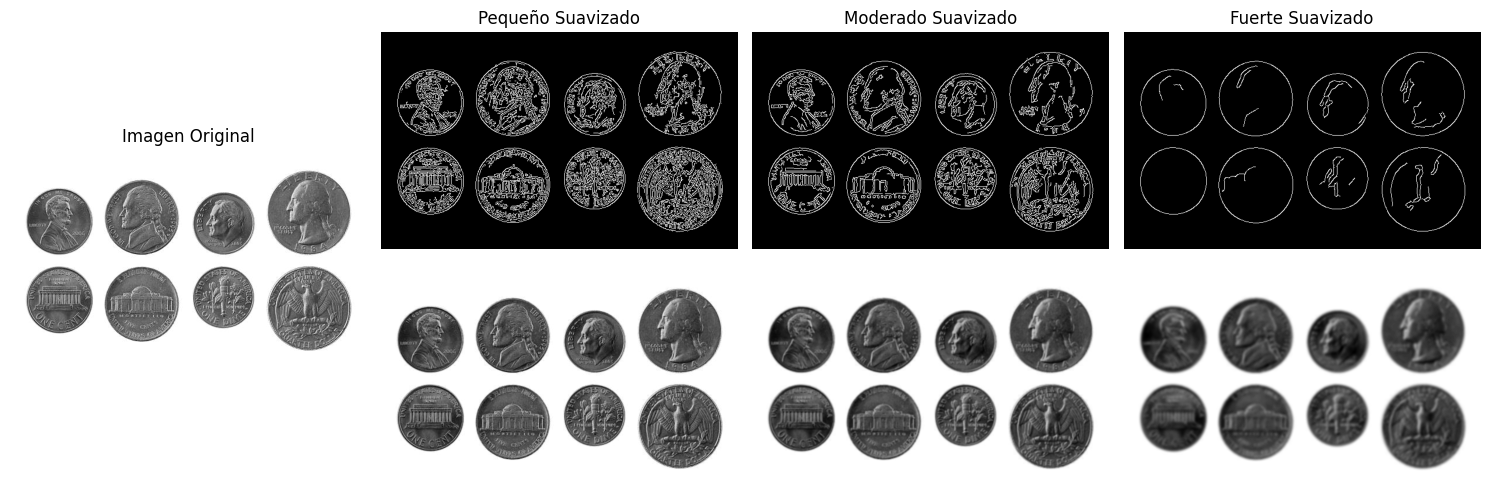

In [ ]:
# Cargar la imagen
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Leer la imagen en escala de grises
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Configuración del filtro Gaussiano y umbrales
gaussian_configs = [
    {"ksize": (3, 3), "sigma": 0.5, "name": "Pequeño Suavizado"},
    {"ksize": (5, 5), "sigma": 1.0, "name": "Moderado Suavizado"},
    {"ksize": (9, 9), "sigma": 2.0, "name": "Fuerte Suavizado"}
]

low_threshold = 50
high_threshold = 150

# Mostrar la imagen original
plt.figure(figsize=(15, 5))
plt.subplot(1, len(gaussian_configs) + 1, 1)
plt.title("Imagen Original")
plt.imshow(image, cmap='gray')
plt.axis('off')

# Aplicar el filtro Gaussiano y Canny para cada configuración
for i, config in enumerate(gaussian_configs):
    # Aplicar filtro Gaussiano
    blurred = cv2.GaussianBlur(image, config["ksize"], config["sigma"])

    # Aplicar el detector de bordes Canny
    edges = cv2.Canny(blurred, low_threshold, high_threshold)

    # Mostrar los resultados
    plt.subplot(2, len(gaussian_configs) + 1, i + 2)
    plt.title(config["name"])
    plt.imshow(edges, cmap='gray')
    plt.axis('off')
    # Mostrar los resultados
    plt.subplot(2, len(gaussian_configs) + 1, 4+(i + 2))
    plt.imshow(blurred, cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

Saving coins.jpg to coins (12).jpg
He encontrado 9 objetos


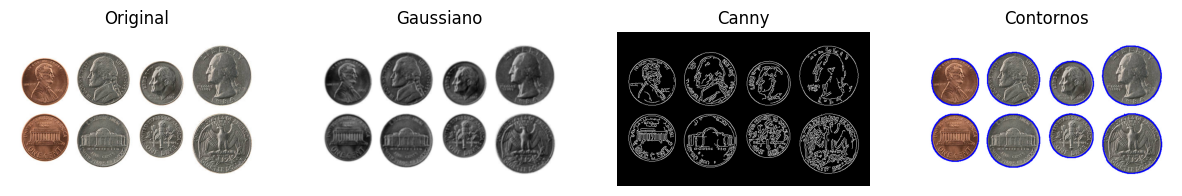

In [ ]:
# Cargar la imagen
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Cargamos la imagen
original = cv2.imread(image_path)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
# Mostrar la imagen
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(original, cmap='gray')
plt.axis('off')

# Convertimos a escala de grises
gris = cv2.cvtColor(original, cv2.COLOR_RGB2GRAY)

# Aplicar suavizado Gaussiano
gauss = cv2.GaussianBlur(gris, (5,5), 0)

# Mostrar la imagen
plt.subplot(1, 4, 2)
plt.title("Gaussiano")
plt.imshow(gauss, cmap='gray')
plt.axis('off')

# Detectamos los bordes con Canny
canny = cv2.Canny(gauss, 50, 150)

# Mostrar la imagen
plt.subplot(1, 4, 3)
plt.title("Canny")
plt.imshow(canny, cmap='gray')
plt.axis('off')

# Buscamos los contornos
# cv2.RETR_EXTERNAL: Recupera solo los contornos externos de cada objeto.
# cv2.CHAIN_APPROX_SIMPLE: Comprime los puntos del contorno guardando solo los puntos esenciales (menos puntos, ahorra memoria)
(contornos,_) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Mostramos el número de monedas por consola
print("He encontrado {} objetos".format(len(contornos)))

# -1: Indica que se dibujarán todos los contornos encontrados (Si fuese otro número, por ejemplo 0, se dibujaría solo el primer contorno detectado.)
# (0,0,255): Color de los contornos dibujados (en este caso rojo en formato BGR)
# 2: Grosor del contorno dibujado (2 píxeles)
cv2.drawContours(original,contornos,-1,(0,0,255), 2)
# Mostrar la imagen
plt.subplot(1, 4, 4)
plt.title("Contornos")
plt.imshow(original, cmap='gray')
plt.axis('off');

Saving perro.png to perro.png


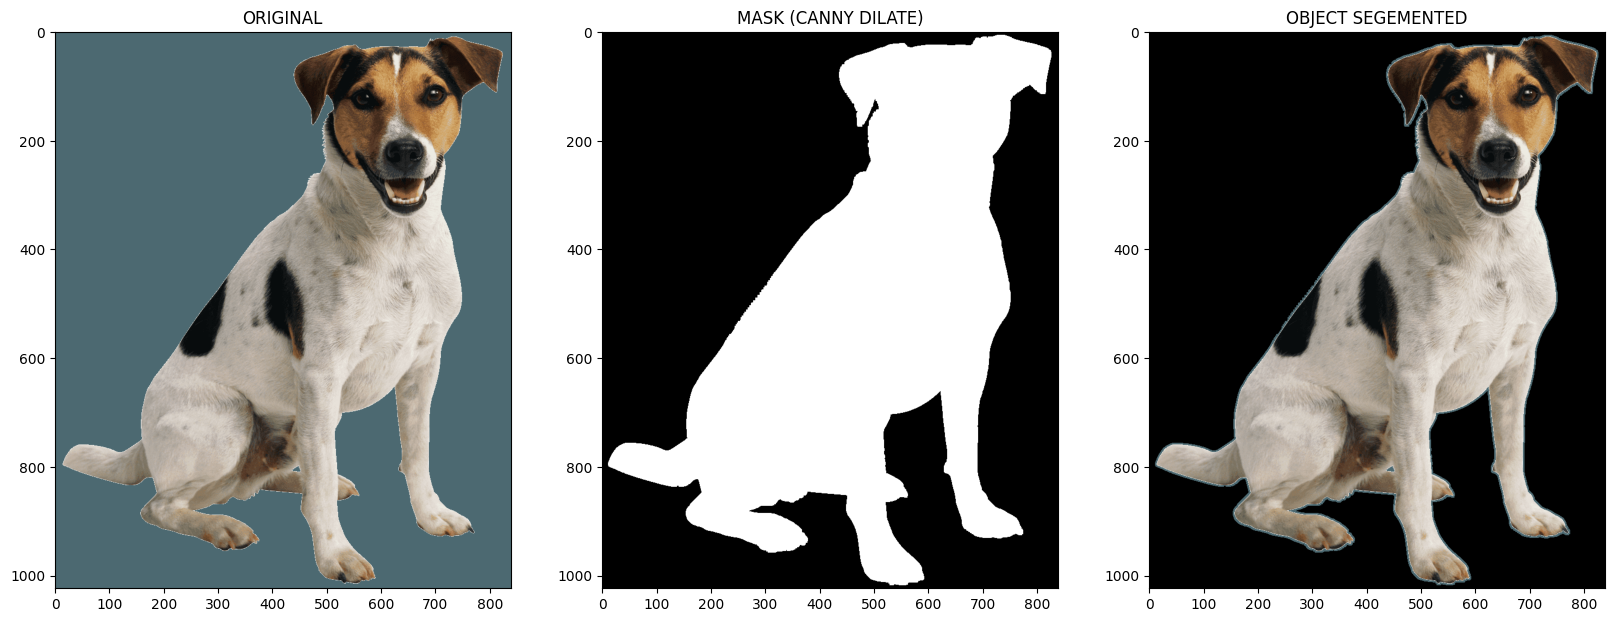

In [ ]:
# Cargar la imagen
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
# Cargamos la imagen
img = cv2.imread(image_path)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

canny = cv2.Canny(img_gray, 5,40)
# Ampliamos un poco los bordes del objeto, DILATACIÓN
kernel =np.ones((5,5), np.uint8)
bordes = cv2.dilate(canny, kernel)
# Generamos la máscara
# cv2.RETR_EXTERNAL: Solo contornos externos
# cv2.RETR_LIST: Todos los contornos sin jerarquía
# cv2.RETR_CCOMP: Dos niveles de jerarquía
# cv2.RETR_TREE: Todos los niveles de jerarquía (contornos externos e internos)
contours,_ = cv2.findContours(bordes,  cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
objetos = bordes.copy()
# [max(contours, key=cv2.contourArea)] El contorno más grande de todos los encontrados (área máxima)
cv2.drawContours(objetos, [max(contours, key=cv2.contourArea)],-1,255,thickness=-1)

objetos = objetos/255
seg = np.zeros(img.shape)
seg[:,:,0] = objetos*img[:,:,0]
seg[:,:,1] = objetos*img[:,:,1]
seg[:,:,2] = objetos*img[:,:,2]
seg = np.uint8(seg)

# Comparamos Resultados de ambos
fig, axs = plt.subplots(1,3, figsize=(20, 20))
axs[0].title.set_text('ORIGINAL')
axs[1].title.set_text('MASK (CANNY DILATE)')
axs[2].title.set_text('OBJECT SEGEMENTED')
axs[0].imshow(img);
axs[1].imshow(objetos, cmap='gray');
axs[2].imshow(seg);

Saving descarga.png to descarga.png


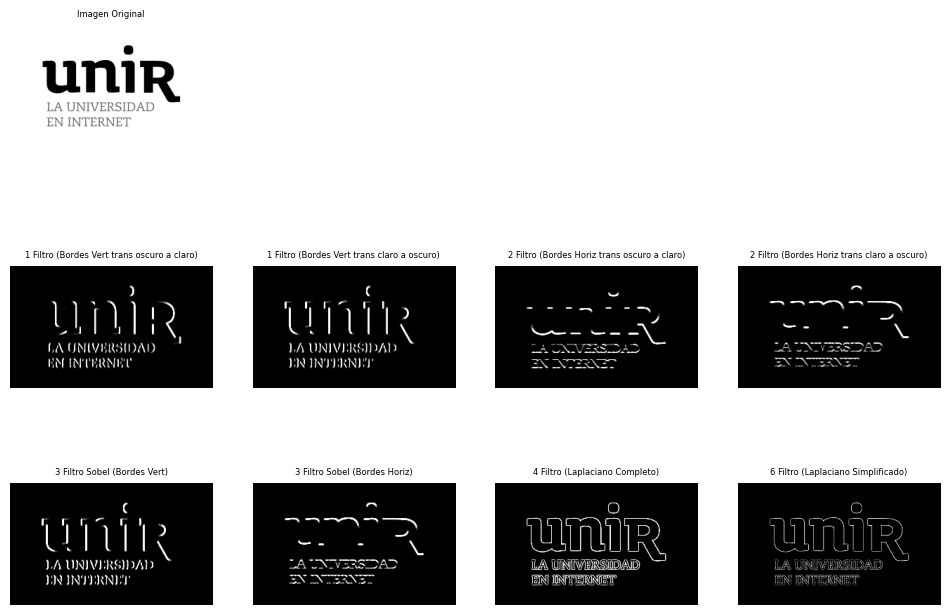

In [ ]:
# Subir una imagen local
uploaded = files.upload()
# Leer la imagen
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Definir los filtros paso-alto (kernels) de la diapositiva
kernels = {
    "1 Filtro (Bordes Vert trans oscuro a claro)": np.array([[-1,  0,  1],
                                                             [-1,  0,  1],
                                                             [-1,  0,  1]]),

    "1 Filtro (Bordes Vert trans claro a oscuro)": np.array([[ 1,  0, -1],
                                                             [ 1,  0, -1],
                                                             [ 1,  0, -1]]),

    "2 Filtro (Bordes Horiz trans oscuro a claro)": np.array([[-1, -1, -1],
                                                              [ 0,  0,  0],
                                                              [ 1,  1,  1]]),

    "2 Filtro (Bordes Horiz trans claro a oscuro)": np.array([[ 1,  1,  1],
                                                              [ 0,  0,  0],
                                                              [-1, -1, -1]]),

    "3 Filtro Sobel (Bordes Vert)": np.array([[ 1, 0, -1],
                                              [ 2, 0, -2],
                                              [ 1, 0, -1]]),

    "3 Filtro Sobel (Bordes Horiz)": np.array([[ 1,  2,  1],
                                               [ 0,  0,  0],
                                               [-1, -2, -1]]),

    "4 Filtro (Laplaciano Completo)": np.array([[-1, -1, -1],
                                                [-1,  8, -1],
                                                [-1, -1, -1]]),

    # "5 Filtro (Laplaciano Direccional)": np.array([[ 1, -2,  1],
    #                                                [-2,  4, -2],
    #                                                [ 1, -2,  1]]),

    "6 Filtro (Laplaciano Simplificado)": np.array([[ 0, -1,  0],
                                                    [-1,  4, -1],
                                                    [ 0, -1,  0]])
}

# Aplicar los filtros a la imagen y guardar los resultados
filtered_images = {}
for name, kernel in kernels.items():
    filtered_images[name] = cv2.filter2D(image, ddepth=-1, kernel=kernel)

# Mostrar la imagen original y las imágenes filtradas
plt.figure(figsize=(12, 8))

# Imagen original
plt.subplot(4, 4, 1)
plt.title("Imagen Original", fontsize=6)
plt.imshow(image, cmap='gray')
plt.axis('off')

for i, (name, filtered_image) in enumerate(filtered_images.items()):
  # Updated lista with enough elements to avoid IndexError
  lista= [5,6,7,8,9,10,11,12] # Added an extra element, for example '4'
  plt.subplot(3, 4, lista[i])
  plt.title(name, fontsize=6)
  plt.imshow(filtered_image, cmap='gray')
  plt.axis('off')